In [1]:
from statsbombpy import sb
import pandas as pd
from mplsoccer import Pitch, Sbopen, VerticalPitch
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

In [2]:
parser  = Sbopen()
df, related, freeze, tactics = parser.event(3943043)
freeze ["player_name"].unique()
df.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'outcome_id', 'outcome_name',
       'under_pressure', 'out', 'counterpress', 'pass_switch',
       'dribble_nutmeg', 'aerial_won', 'pass_cross', 'technique_id',
       'technique_name', 'pass_no_touch', 'foul_won_defensive', 'off_camera',
       'pass_assisted_shot_id', 'pass_shot_assist', 'shot_one_on_one',
       'shot_statsbomb_xg', 'shot_key_pass_id', 'goalkeeper_position_id',
       'goalkeeper_position_name', 'end_z',

In [3]:
name_replacements = {
    'Daniel Olmo Carvajal': 'Daniel Olmo',
    'Fabián Ruiz Peña': 'Fabián',
    'Lamine Yamal Nasraoui Ebana': 'Lamine Yamal',
    'Álvaro Borja Morata Martín': 'Álvaro Borja Morata',
    'Daniel Carvajal Ramos': 'Daniel Carvajal',
    'Rodrigo Hernández Cascante': 'Rodri',
    'Nicholas Williams Arthuer': 'N.Williams',
    'Marc Cucurella Saseta': 'Marc Cucurella',
    'Robin Aime Robert Le Normand': 'Robin Aime Robert LeNormand',
    'Unai Simón Mendibil': 'Unai Simón',
    'Martín Zubimendi Ibáñez': 'Martín Zubimendi ',
    'Mikel Oyarzabal Ugarte': 'Mikel Oyarzabal ',
    'Mikel Merino Zazón': 'Mikel Merino',
    'José Ignacio Fernández Iglesias': 'José Ignacio Fernández Iglesias'  }



df.replace(name_replacements, inplace=True)
related.replace(name_replacements, inplace=True)
freeze.replace(name_replacements, inplace=True)
tactics.replace(name_replacements, inplace=True)

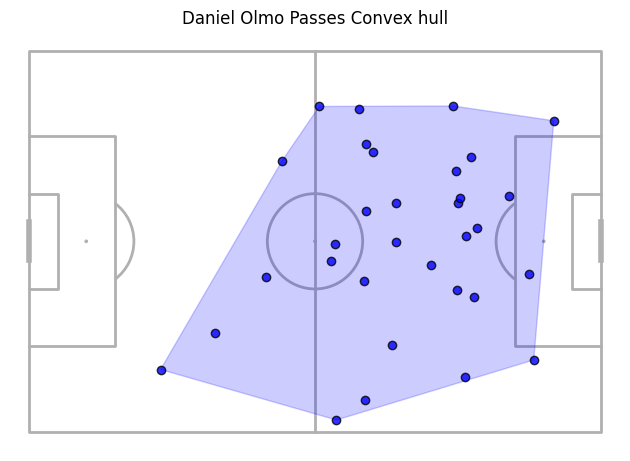

In [5]:
player_pass_mask = (df.type_name == 'Pass') & (df.player_name == "Daniel Olmo")
    # create dataframe of our player passes
player_df = df[player_pass_mask]
pitch = Pitch()

fig, ax = pitch.draw()
    # plot convex hull
hull = pitch.convexhull(player_df.x, player_df.y)
pitch.polygon(hull, ax=ax, edgecolor='blue', facecolor='blue', alpha=0.2)
    # plot scatter
pitch.scatter(x=player_df.x, y=player_df.y, ax=ax, edgecolor='black', color='blue', alpha=0.8)
    # set the title
ax.set_title(f'Daniel Olmo Passes Convex hull')
plt.show()